<h1><center> Stock Price Forcasting Using ARIMA</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract


[Back to Contents](#Contents)

# Introduction

A time series is a series of data points collected in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Therefore it is a sequence of discrete-time data. Examples of time series are stock market forecasting, heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average. Time series analysis gives the methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.[1] 

Ever since the stock being invented, the demand of forecasting the future price fluctuation has always been high for investors. The more accurate the prediction is, the more investors can benefit from it. In investing, it is really common to use a time series to trace the price of a security over time. This can be either short term or long term. Autoregressive Integrated Moving Average(ARIMA) model is a popular statistical method for time series prediction. 

In this project, we will be using the Apple stock price from Yahoo starting from Jan 1st 2014 to Jun 1st 2019. ARIMA, Autoregressive Integrated Moving Average is used in this project create a model based on this time series data and then forecast the future stock prices. 

In the followings, we will be discussing the assumptions and parameters of this model, construct and train a ARIMA model, evaluate the performance and at last fit and forecast future stock prices. 

[Back to Contents](#Contents)

# Background

**1. Time Series Decomposition**

Time series data often shows three major patterns: trend, seasonality and cycles. When doing analysis on them, it is very useful to break down the time series data into several components first so that we can understand the time series data better. Trend and cycles are combined together for simplicity, therefore we can look at three components: a trend component(trend), a seasonal component(seasonality), and a remainder component(anything else in the time series).[2] The whole time series analysis begins with the assumption that the data has the combination of these three components:

- **Trend** 

The underlying trend of the data. For example, the stock price has been increasing and it should go a general trend of going up. 

- **Sesonality**

Obvious patterns that repeat with a fixed period of time. For example, Apple website may experience a high volume of visitors after they release new products in September because people are curious and want to check out them. 

- **Reminder**

You can also consider this as “noise” or “irregular”. It is bascially the residuals of the original time series after the seasonal and trend series are removed.

**2. ARIMA model**

As we have discussed above, ARIMA model is a very popular, simple and powerful model for analyzing and forecasting time series data. 

ARIMA divides up to three parts of analyzing time series data. Every single one of the above three points are used in this model as a parameter which are p, d, and q. That is the reason when we see ARIMA(p,d,q), we will automatically know how this model is using these parameters. They are as followings:

- **AR or p**

Stands for Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. It is used to tell ARIMA model the number of lag observations included in the model. For example, if p =3, it means that we need to use three previous periods of the time series in the autoregressive portion of the calculation.[3]


- **I or d**

Integrated. The use of differencing of raw observations meaning that it needs to subtract an observation from another observation at the previous time point so that we can keep the time series stationary, meaning we make this series without trend and seasonality. The d parameter is used in ARIMA to specify the number of times that the raw observations are difference. 


- **MA or q**

Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. The q paramter gives the size of the moving average window. 


[Back to Contents](#Contents)

# Methods

#### Stationary Assumption

There is a very important assumption to use ARIMA model, STATIONARY. It is basically means that data should be stationary as in no existance of trend in data. Stationarity is a one type of dependence structure just as the independence assumption we have for regression models. We do need this assumption to hold so that we could know our model is consist over the time period and we are confident about the model output at different time points. We can get this assumption proved through visualization or a statistical test. Visualization can be done through decomposition and look at the seasonality plot. Dicky-Fuller test can be used to test out whether the data is not stationary. If this assumption is not met, it is still possible to use ARIMA by substracting the moving mean and perform Dicky-Fuller on the differenced data again to confirm it is passed. 

#### Parameter Tweaking

There are 8 rules that could help on the parameter tweaking for modelling process through visualizing Autocorrelation and Partial Autocorrelation Functions.[4]

**1. Determine value of d**
    
The d parameter is used in ARIMA to specify the number of times that the raw observations are difference.
    
- Rule 1: If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.

- Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of  differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced. But pay attention to overdifferencing.

- Rule 3: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest.

- Rule 4: A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend.

- Rule 5: A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean value). A model with two orders of total differencing normally does not include a constant term. In a model with one order of total differencing, a constant term should be included if the series has a non-zero average trend.
    
**2. Determine value of p and q**
    
It is to determine the number of lag observations and the size of moving average window included in the model. 
    
Through the Autocorrelation Function, we can tell the relationship between a variable at time t and the same variable at time t-k, and k is a random integer. 
    
Generally speaking, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we have A,B,C as our features and Y as the response variable, the partial correlation between Y and C is the amount of correlation between Y and C that is not explained by their common correlations with A and B. 
    
Through visualizing these two functions, we can clearly find out the location of the sharp cutoffs to determine the value of p and q.
    
- Rule 6: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms.

- Rule 7: If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.
    
#### Error Metric and Performance Evaluation

Based on the model output of time series in Python there are two error metrics that we can use the evaluate the performance: AIC and BIC. 

- AIC or the Akaike Information Critera

It is a popular metric in statistical model performance evaluation . It brings insights on the the goodness of fit and the simplicity/parsimony, of the model into a single statistic.[5] We prefer a lower value of AIC when compares two models against each other.

- BIC or Bayesian Information Criterion

Similar to AIC, BIC is an estimate to tell the probability of a model being true using a certain Bayesian setup. Just like AIC, we prefer a lower BIC since a lower value indicate a higher likelyhood of a model being true. 






[Back to Contents](#Contents)

# Results

#### Stationary Assumption: Data Non-Stationary

Based on the decomposition we have done, there is no obvious seasonality. Based on the Dickey-Fuller test which has a null hypothesis of a time series variable is non-stationary and possesses a unit root. The critical value are calculated at 90%, 95% and 99% confidence level, we fail to reject the null hypothesis at 90% confidence level with a critical value of -2.568 meaning that data is **not stationary**. 

- **1. Decomposition Visualization**

show plot from cell 20

- **2. Dickey-Fuller Test Result**

show result from cell 21

#### Rolling Mean Substract

substract rolling mean, show result from cell 22 + 23, test passed


#### Visualization of Autocorrelation and Partial Autocorrelation

1. results from cell 24+25, initial result
2. then parameter tweaking and grid search to find the best set of parameters from cell 27
3. best set of parameter is at cell 29

#### Final Model Used

screenshot of cell 29

- **Error Metrics and Performance Evaluation**

compare result from the inital model and best model in terms of AIC + BIC

[Back to Contents](#Contents)

# Conclusion




[Back to Contents](#Contents)

# Reference

[1] https://en.wikipedia.org/wiki/Time_series

[2] https://otexts.com/fpp2/decomposition.html

[3] https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

[4] https://people.duke.edu/~rnau/411arim2.htm

[5] https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/

[Back to Contents](#Contents)

# Appendix




[Back to Contents](#Contents)

## Codes


Load the data and plot it.  Note that to make the index a time object in python, we need to do a conversion
$superscript^2 subscriot_7 x^{n-1}$

In [1]:
#!pip install pandas_datareader


In [2]:
import pandas as pd
import numpy as np

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import matplotlib 
import datetime
from pandas_datareader import data as web
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
 


In [3]:


def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [4]:

pd.core.common.is_list_like = pd.api.types.is_list_like
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 6, 1)
price = web.DataReader('AAPL', 'yahoo', start, end)#["Close"]
price.index = pd.to_datetime(price.index)

In [5]:
price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,66.707436
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,65.242165
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,65.597923
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,65.128777
2014-01-08,77.937141,76.955711,76.972855,77.637146,64632400.0,65.541245


In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1030 entries, 2014-01-02 to 2018-02-02
Data columns (total 6 columns):
High         1030 non-null float64
Low          1030 non-null float64
Open         1030 non-null float64
Close        1030 non-null float64
Volume       1030 non-null float64
Adj Close    1030 non-null float64
dtypes: float64(6)
memory usage: 56.3 KB


In [7]:
price.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1030.000000,1030.000000,1030.000000,1030.000000,1.030000e+03,1030.000000
mean,119.007836,117.099734,118.066929,118.089022,4.491387e+07,111.623590
std,25.748135,25.541547,25.673594,25.656072,2.470687e+07,26.824869
min,71.647141,70.507141,70.739998,71.397141,1.147590e+07,60.273430
25%,100.462500,98.415001,99.252501,99.544998,2.741312e+07,92.907366
50%,114.544998,112.405003,113.634998,113.560001,3.905750e+07,106.986568
75%,132.187500,130.012501,131.164997,131.230000,5.524732e+07,123.162502
max,180.100006,178.250000,179.369995,179.259995,2.663808e+08,175.179718


In [8]:
price=price["Close"]

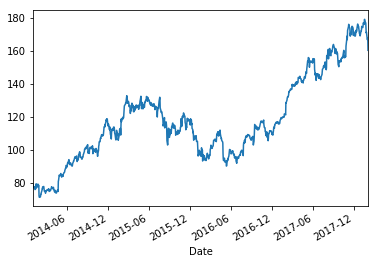

In [9]:
price.plot()

In [10]:
price.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29', '2018-01-30', '2018-01-31',
               '2018-02-01', '2018-02-02'],
              dtype='datetime64[ns]', name='Date', length=1030, freq=None)

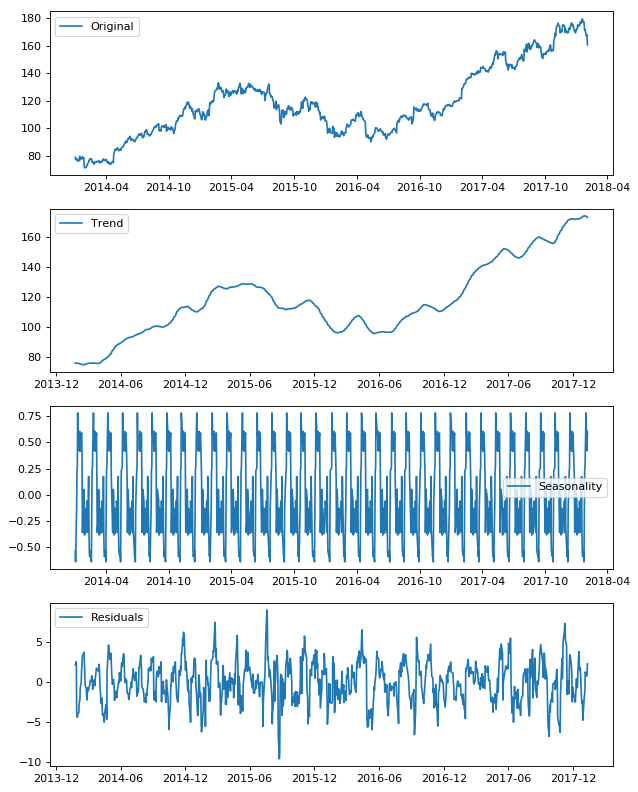

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(price,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(411)
plt.plot(price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

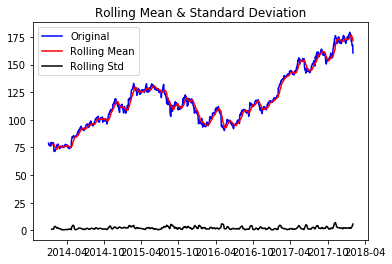

Results of Dickey-Fuller Test:
Test Statistic                   -0.923253
p-value                           0.780219
#Lags Used                        0.000000
Number of Observations Used    1029.000000
Critical Value (1%)              -3.436721
Critical Value (5%)              -2.864353
Critical Value (10%)             -2.568268
dtype: float64


In [12]:
test_stationarity(price)

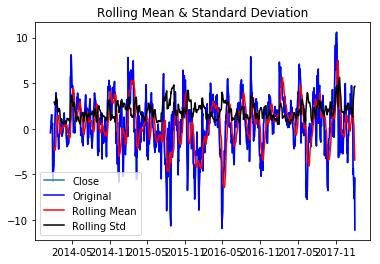

Results of Dickey-Fuller Test:
Test Statistic                -6.557209e+00
p-value                        8.557082e-09
#Lags Used                     1.100000e+01
Number of Observations Used    1.007000e+03
Critical Value (1%)           -3.436860e+00
Critical Value (5%)           -2.864414e+00
Critical Value (10%)          -2.568300e+00
dtype: float64


In [13]:
moving_avg = price.rolling(12).mean()
no_trend = price - moving_avg
plt.plot(no_trend)
plt.title("Apple Stock Data with Rolling Mean Subtracted")
test_stationarity(no_trend.dropna())


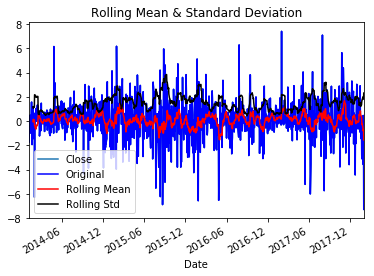

Results of Dickey-Fuller Test:
Test Statistic                  -30.945251
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1028.000000
Critical Value (1%)              -3.436727
Critical Value (5%)              -2.864356
Critical Value (10%)             -2.568269
dtype: float64


In [14]:
diff=price-price.shift()
diff.dropna(inplace=True)
diff.plot()
test_stationarity(diff)

Text(0.5,1,'Autocorrelation Function')

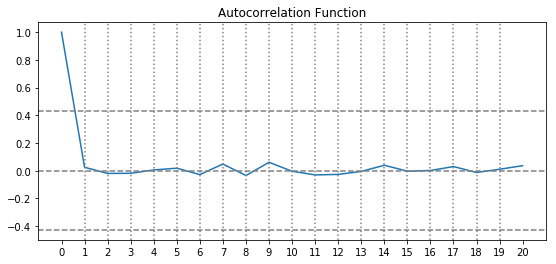

In [15]:
acf_apple = acf(diff, nlags=20)
#Plot ACF: 
plt.figure(figsize=(20, 4))

plt.subplot(121) 
plt.plot(acf_apple)
plt.xticks(np.arange(21))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(acf_apple)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(acf_apple)),linestyle='--',color='gray')
for i in range(1,20):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Partial Autocorrelation Function')

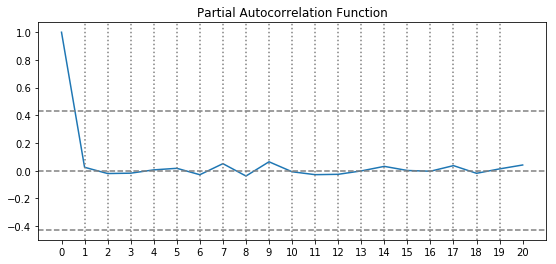

In [16]:
pacf_apple = pacf(diff, nlags=20)
#Plot ACF: 
plt.figure(figsize=(20, 4))

plt.subplot(121) 
plt.plot(pacf_apple)
plt.xticks(np.arange(21))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(acf_apple)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(acf_apple)),linestyle='--',color='gray')
for i in range(1,20):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('Partial Autocorrelation Function')

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1029
Model:                     ARMA(1, 0)   Log Likelihood               -1967.180
Method:                       css-mle   S.D. of innovations              1.637
Date:                Sun, 23 Jun 2019   AIC                           3940.360
Time:                        20:36:25   BIC                           3955.169
Sample:                             0   HQIC                          3945.981
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0790      0.052      1.508      0.132      -0.024       0.182
ar.L1.Close     0.0252      0.031      0.799      0.424      -0.037       0.087
                                    Roots       

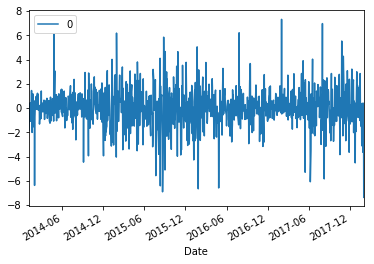

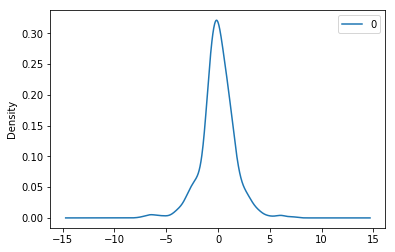

                 0
count  1029.000000
mean      0.000044
std       1.637691
min      -7.365775
25%      -0.780633
50%      -0.021363
75%       0.868449
max       7.330080


In [17]:
model = ARIMA(diff, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

52.52466313461176


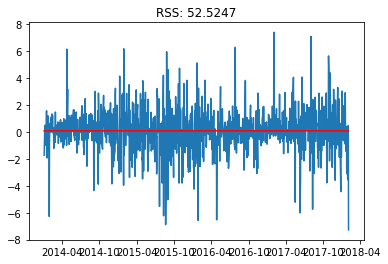

0 0 0
52.50768075027926


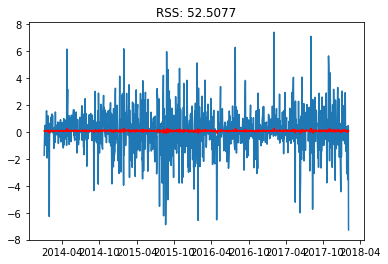

0 0 1
52.498223649362046


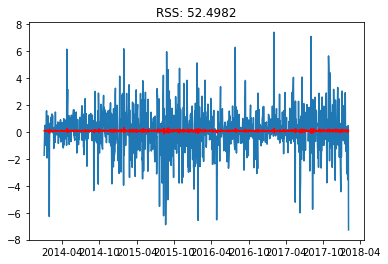

0 0 2


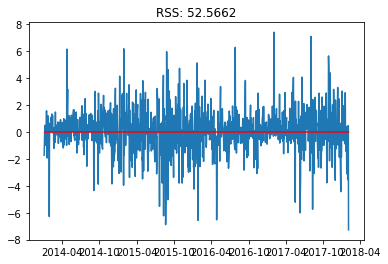

0 1 0


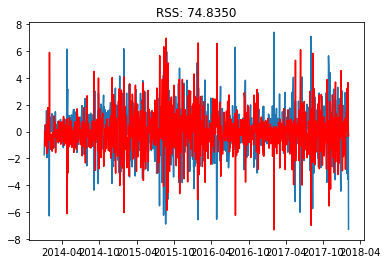

0 1 1


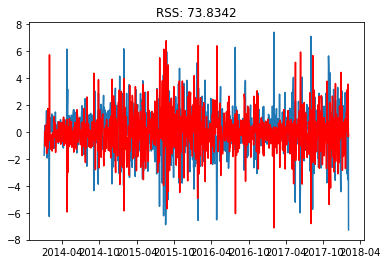

0 1 2


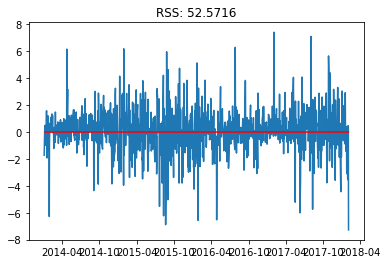

0 2 0


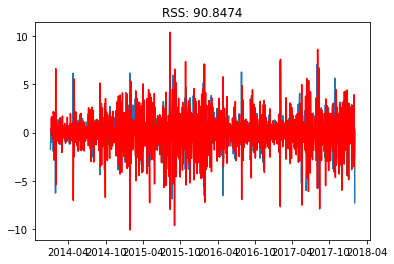

0 2 1


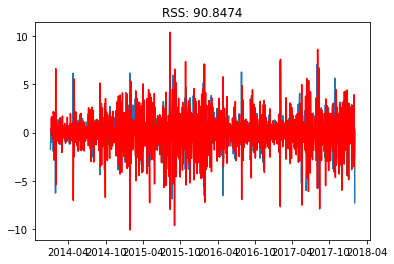

0 2 2


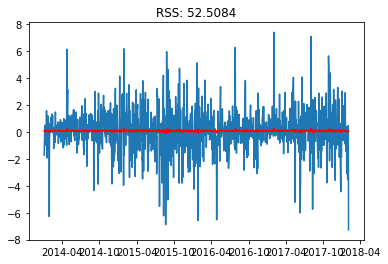

1 0 0
52.44679439966083


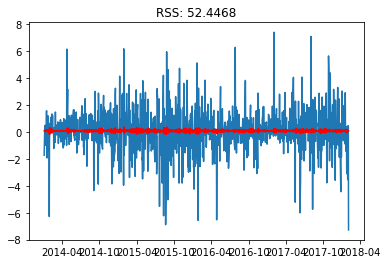

1 0 1


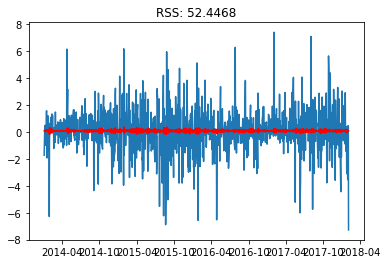

1 0 2


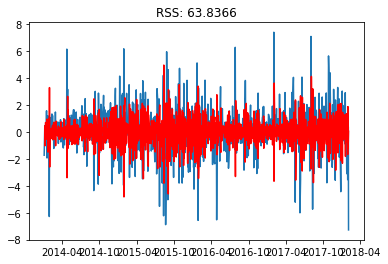

1 1 0


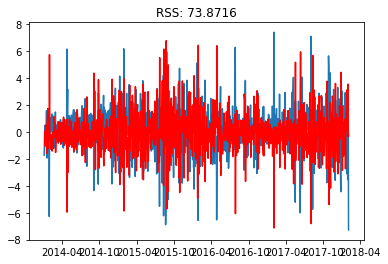

1 1 1


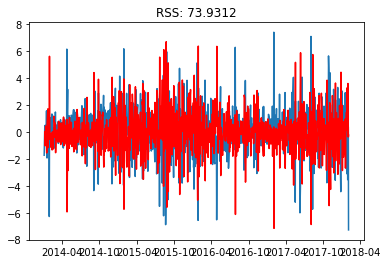

1 1 2


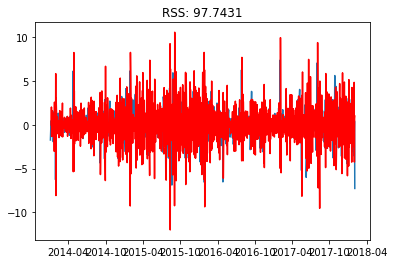

1 2 0


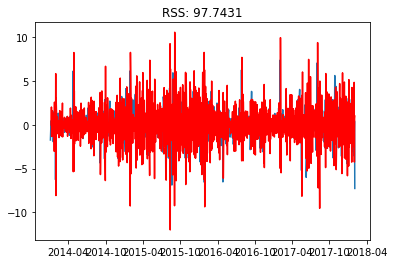

1 2 1


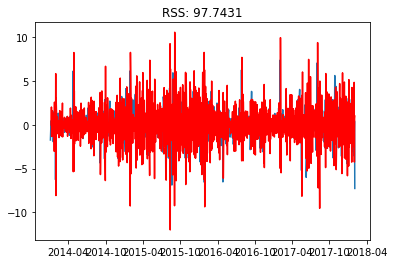

1 2 2


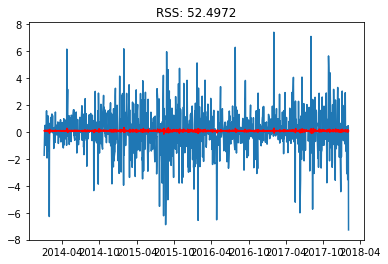

2 0 0


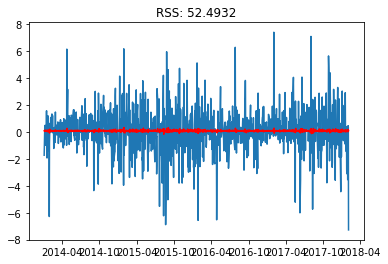

2 0 1
52.220201060966104


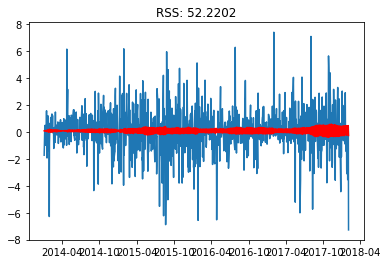

2 0 2


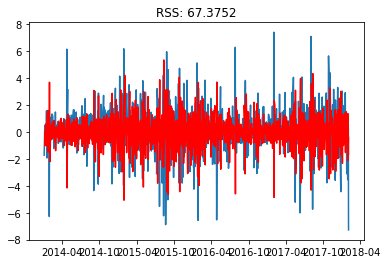

2 1 0


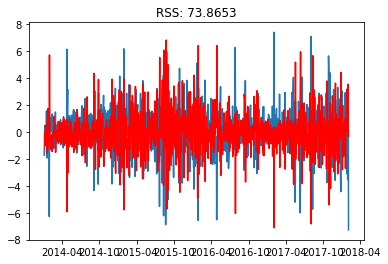

2 1 1


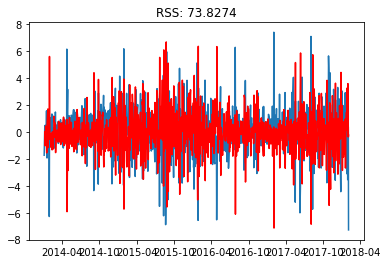

2 1 2


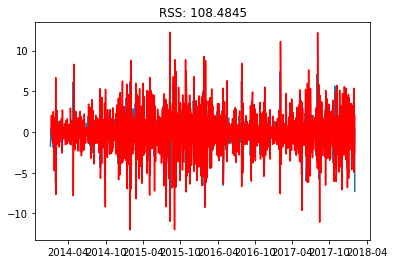

2 2 0


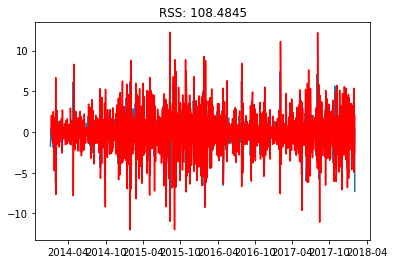

2 2 1


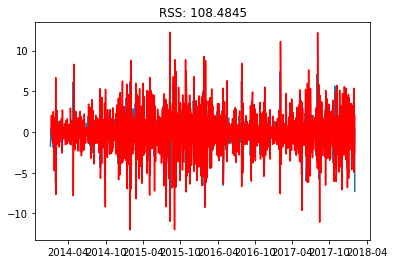

2 2 2


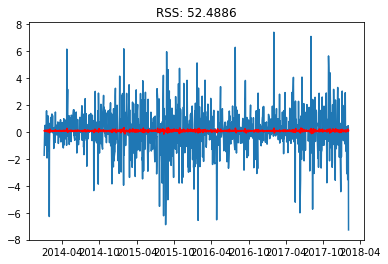

3 0 0


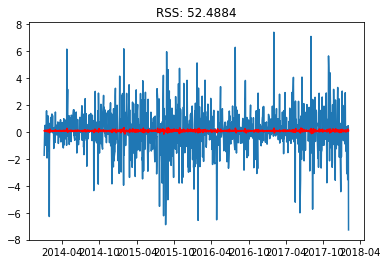

3 0 1


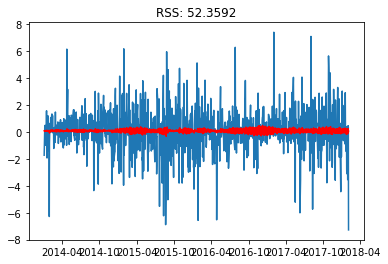

3 0 2


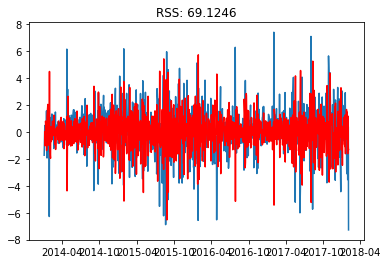

3 1 0


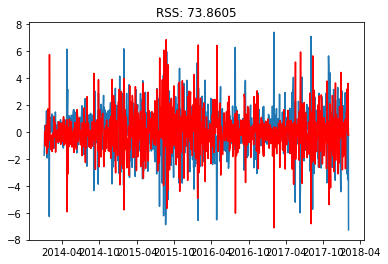

3 1 1


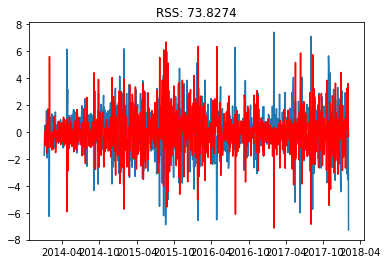

3 1 2


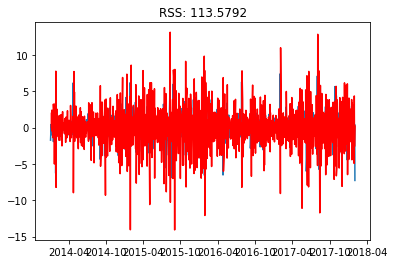

3 2 0


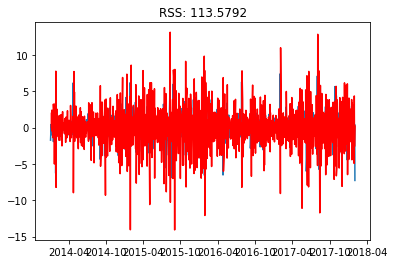

3 2 1


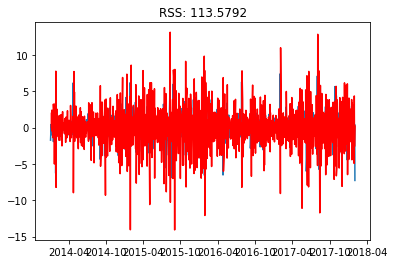

3 2 2


In [23]:
loss_best = 1E16
best_ints = [-1,-1,-1]
for p in range(4):
    for d in range(3):
        for q in range(3):
            model = ARIMA(diff, order=(p, d, q))  
            try:
                results_ARIMA = model.fit(disp=-1)
            except ValueError:
                pass
            except:
                pass
            plt.plot(diff)
            plt.plot(results_ARIMA.fittedvalues, color='red')
            x=pd.DataFrame(results_ARIMA.fittedvalues)
            x=x.join(diff)
            x['out']=(x.iloc[:,0]-x.iloc[:,1])**2
            loss=np.sqrt(x['out'].sum())
            plt.title('RSS: %.4f'% loss)
            if loss < loss_best:
                print(loss)
                loss_best = loss
                best_ints=[p,d,q]
            plt.show()
            print(p,d,q)

In [24]:
loss_best

52.220201060966104

to search for the 81.2276500147883 and find the best configuration


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1029
Model:                     ARMA(2, 1)   Log Likelihood               -1966.882
Method:                       css-mle   S.D. of innovations              1.636
Date:                Sun, 23 Jun 2019   AIC                           3943.765
Time:                        20:52:45   BIC                           3968.447
Sample:                             0   HQIC                          3953.133
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0793      0.051      1.567      0.117      -0.020       0.178
ar.L1.Close     0.3610      0.728      0.496      0.620      -1.066       1.788
ar.L2.Close    -0.0313      0.034     -0.930    

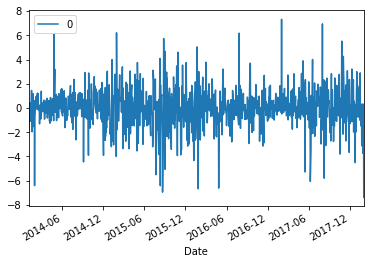

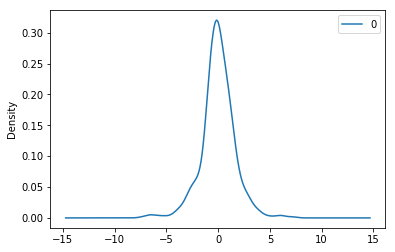

                 0
count  1029.000000
mean     -0.000012
std       1.637217
min      -7.375896
25%      -0.756155
50%      -0.023225
75%       0.877848
max       7.321794


In [25]:
model = ARIMA(diff, order=(2,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())